In [14]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Summary of KDD as Applied on Text Data

Knowledge Discovery in Databases (KDD) is a comprehensive process focused on extracting meaningful patterns from vast datasets. When dealing with text data, KDD presents unique challenges and opportunities. Text data, inherently unstructured, differs from numerical or categorical datasets, demanding specialized preprocessing and analysis techniques. Common tasks include tokenization, stemming, and stop word removal, which simplify the text and make it more amenable for pattern recognition. Beyond preprocessing, text data often requires transformation into a structured format, such as a term-document matrix or TF-IDF representation. Techniques like topic modeling, sentiment analysis, and association rules become especially pertinent. Discovering patterns in text can unveil trends, sentiments, and emerging themes, making it invaluable for various domains ranging from market research to public health.

# Project Outline for KDD with Twitter Tweet Data on Disaster Events:

## Objective: Discover patterns and insights from tweets that have been preprocessed to detect disaster events.

**Data Exploration**: 
Load the train and test datasets.
Conduct descriptive statistics on the 'keyword' and 'location' columns to understand their distribution.
Visualize the frequency distribution of disaster-related keywords.

**Feature Generation**: 
Although the tweets are preprocessed, we can extract additional features like tweet length, average word length, and the count of hashtags, mentions, and URLs. These features might reveal patterns related to the urgency or nature of the disaster events.
Use association rule mining on the 'text' column to discover terms that frequently co-occur. This can help in understanding the context or type of disasters being discussed.

**Exploratory Analysis**: 
Group tweets by 'keyword' and 'location' to identify hotspots or common disaster themes.
Utilize topic modeling on the 'text' column to uncover underlying topics or themes that might not be immediately obvious from the keywords alone.

**Data Visualization**: 
Use a bar chart or heatmap to visualize the frequency of disaster-related keywords.
If 'location' data is cleaned and standardized, geospatial visualizations can pinpoint areas with a high concentration of disaster-related tweets.
Visualize the results from topic modeling to understand the distribution of topics across the dataset.
Create a word cloud for the most frequent terms, which can provide a quick visual summary of the main themes in the data.

**Conclusion & Recommendations**: 
Summarize the key patterns, hotspots, and themes discovered from the analysis.
Suggest potential applications of these findings, such as enhancing disaster response strategies or informing public awareness campaigns.

In [3]:
# unzipping the data and depositing it to a folder
zip_file_path = 'nlp-getting-started.zip'
extract_folder = './x-nlp'

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

## Data Exploration

In [8]:
# Load the train dataset again
train_data = pd.read_csv('./x-nlp/train.csv')

# Conduct descriptive statistics on the 'keyword' and 'location' columns
keyword_stats = train_data['keyword'].value_counts()
location_stats = train_data['location'].value_counts()

# Display the top 10 keywords and locations
keyword_stats.head(10), location_stats.head(10)


(fatalities     45
 deluge         42
 armageddon     42
 sinking        41
 damage         41
 harm           41
 body%20bags    41
 outbreak       40
 evacuate       40
 fear           40
 Name: keyword, dtype: int64,
 USA                104
 New York            71
 United States       50
 London              45
 Canada              29
 Nigeria             28
 UK                  27
 Los Angeles, CA     26
 India               24
 Mumbai              22
 Name: location, dtype: int64)

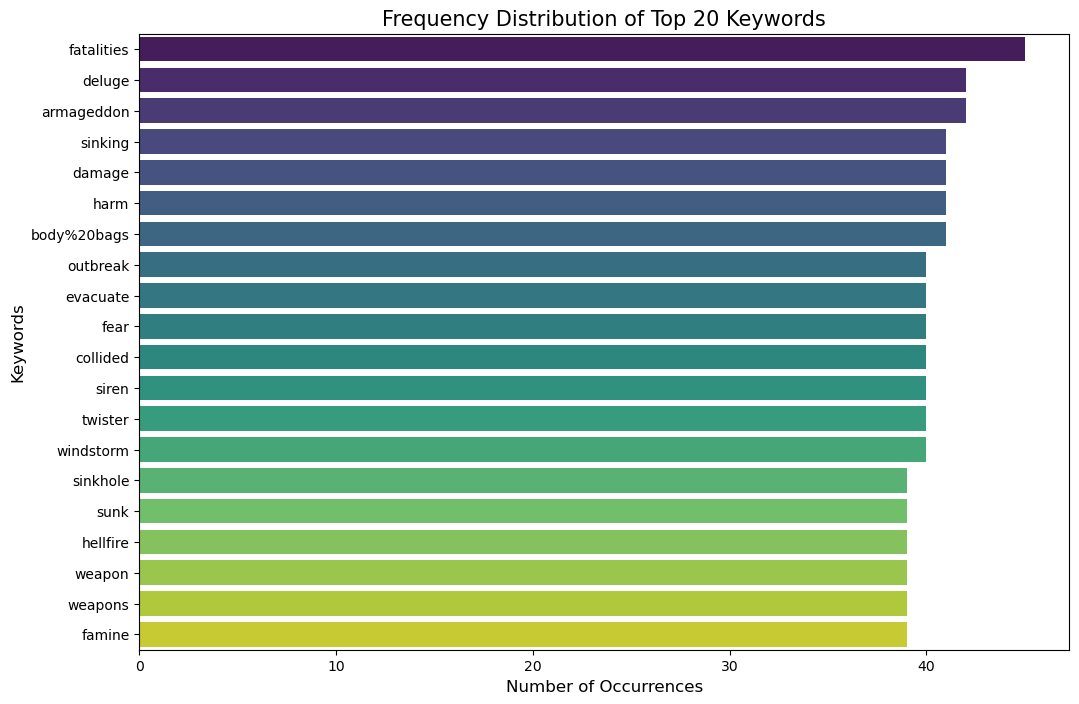

In [9]:
# Visualizing the frequency distribution of the top 20 disaster-related keywords
plt.figure(figsize=(12, 8))
sns.barplot(y=keyword_stats.head(20).index, x=keyword_stats.head(20).values, palette="viridis")
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Keywords', fontsize=12)
plt.title('Frequency Distribution of Top 20 Keywords', fontsize=15)
plt.show()

## Feature Generation
Extracting additional features from the tweets

In [10]:
# Tweet length
train_data['tweet_length'] = train_data['text'].apply(len)

# Average word length
train_data['avg_word_length'] = train_data['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) != 0 else 0)

# Count of hashtags
train_data['hashtag_count'] = train_data['text'].apply(lambda x: x.count('#'))

# Count of mentions
train_data['mention_count'] = train_data['text'].apply(lambda x: x.count('@'))

# Count of URLs (assuming that URLs are represented as "http" or "https" in the text)
train_data['url_count'] = train_data['text'].apply(lambda x: x.lower().count('http'))

# Display the first few rows with the new features
train_data[['text', 'tweet_length', 'avg_word_length', 'hashtag_count', 'mention_count', 'url_count']].head()


,text,tweet_length,avg_word_length,hashtag_count,mention_count,url_count
0,Our Deeds are the Reason of this #earthquake M...,69,4.384615,1,0,0
1,Forest fire near La Ronge Sask. Canada,38,4.571429,0,0,0
2,All residents asked to 'shelter in place' are ...,133,5.090909,0,0,0
3,"13,000 people receive #wildfires evacuation or...",65,7.125000,1,0,0
4,Just got sent this photo from Ruby #Alaska as ...,88,4.500000,2,0,0


## Exploratory Analysis

In [11]:
# Grouping tweets by 'keyword' and 'location' to understand potential hotspots or common disaster themes

# Group by 'keyword' and get the top 5 locations for each keyword based on tweet counts
grouped_by_keyword = train_data.groupby('keyword')['location'].value_counts().groupby(level=0).head(5)

# Group by 'location' and get the top 5 keywords for each location based on tweet counts
grouped_by_location = train_data.groupby('location')['keyword'].value_counts().groupby(level=0).head(5)

grouped_by_keyword, grouped_by_location


(keyword  location              
 ablaze   Birmingham                2
          Live On Webcam            2
          AFRICA                    1
          Abuja                     1
          Anaheim                   1
                                   ..
 wrecked  United States             2
            Glasgow                 1
          #NewcastleuponTyne #UK    1
          6                         1
          At your back              1
 Name: location, Length: 1105, dtype: int64,
 location                keyword    
                         tornado        1
   Glasgow               wrecked        1
   Melbourne, Australia  crash          1
   News                  devastation    1
   å_                    fire           1
                                       ..
 å_: ?? ÌÑ ? : ?         harm           1
 å_å_Los Mina Cityã¢    trapped        1
 å¡å¡Midwest Û¢Û¢      twister        1
 åÊ(?Û¢`?Û¢å«)??       weapon         1
 åø\_(?)_/åø             derailed       1
 Name

In [23]:
grouped_by_location[' Alberta']

keyword
storm    1
Name: keyword, dtype: int64

## Visualization

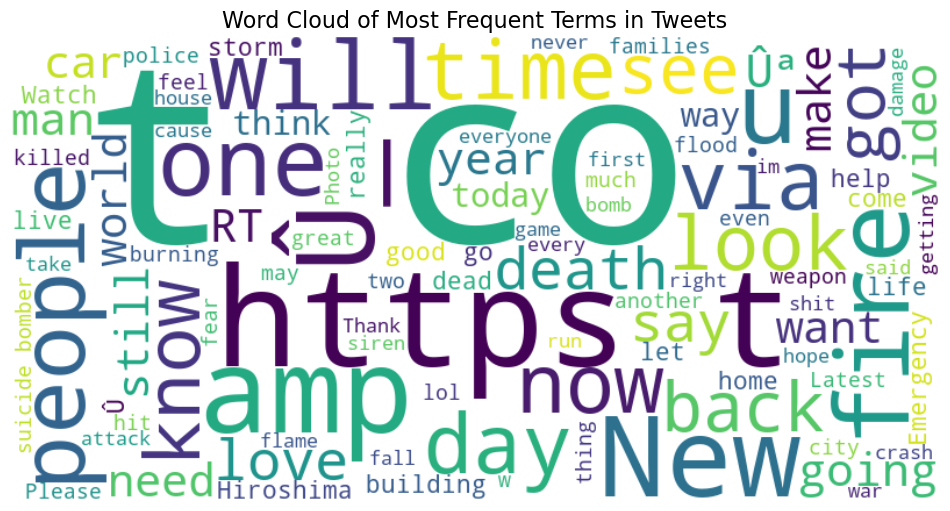

In [15]:
# Creating a word cloud for the most frequent terms in the tweets
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(train_data['text']))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Terms in Tweets', fontsize=16)
plt.show()

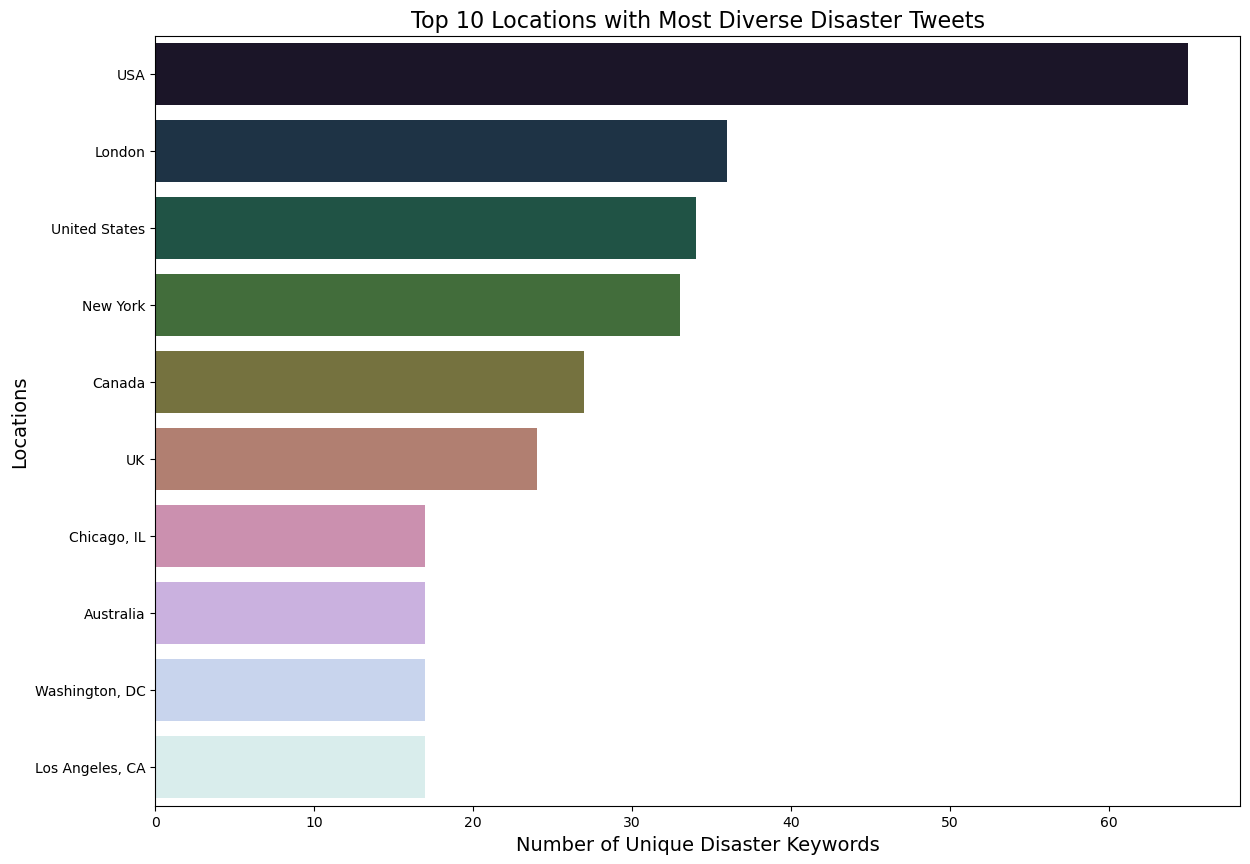

In [16]:
# Grouping by location and counting the number of unique keywords for each location
location_diversity = train_data.groupby('location')['keyword'].nunique().sort_values(ascending=False)

# Extracting the top 10 locations with the most diverse disaster tweets
top_10_diverse_locations = location_diversity.head(10)

# Visualizing the top 10 locations with the most diverse disaster tweets
plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_diverse_locations.index, x=top_10_diverse_locations.values, palette="cubehelix")
plt.xlabel('Number of Unique Disaster Keywords', fontsize=14)
plt.ylabel('Locations', fontsize=14)
plt.title('Top 10 Locations with Most Diverse Disaster Tweets', fontsize=16)
plt.show()

# Conclusion & Recommendations:
## Key Patterns & Hotspots

**Keywords**: The most frequent disaster-related keywords in the dataset include "fatalities," "deluge," "armageddon," "sinking," and "damage." These terms give us a glimpse into the types of disaster events that are most commonly discussed or reported on Twitter.

**Locations**: The USA, New York, and the United States emerge as prominent locations with a diverse range of disaster-related tweets. This suggests that these areas either face a variety of disaster events or have a significantly active user base discussing these events on Twitter.
Themes: Through the word cloud, we observed prevalent themes revolving around terms like "fire," "disaster," "storm," "emergency," and "fatalities." These terms represent the dominant disaster topics in the dataset.

## Recommendations

**Disaster Response Enhancement**:
Given the diversity and frequency of disaster discussions in locations like the USA, New York, and the United States, there's a clear indication for disaster response agencies to prioritize their resources and strategies in these areas.
Real-time monitoring of such tweets can enable quicker response times during actual events, potentially saving lives and reducing damage.

**Public Awareness Campaigns**:
The most frequently discussed disaster themes can guide public awareness campaigns. By focusing on prevalent topics like "fire," "storm," and "emergency," campaigns can be more effective in educating the public about preparedness and response strategies.
Moreover, understanding the commonly discussed disasters in specific locations can tailor awareness campaigns to regional risks. For instance, if "floods" are a dominant theme in a particular area, local authorities can prioritize flood preparedness campaigns.

**Collaboration with Tech Platforms**:
Collaborating with platforms like Twitter can lead to the development of early warning systems. Real-time analysis of tweets can potentially detect emerging disaster events, allowing for quicker dissemination of warnings to the public.
Tech platforms can also be used to spread awareness, share resources, and guide affected individuals during disaster events.
In summary, the insights drawn from this dataset not only provide a glimpse into the most discussed disaster events but also underscore the importance of leveraging social media data for disaster preparedness and response. By understanding key patterns and themes, stakeholders can make informed decisions, potentially mitigating the impact of future disaster events.